# Анализ базы данных сервиса для чтения книг по подписке

**Заказчик**

Коммерческий департамент компании

**Цель исследования**

Анализ базы данных свежекупленного сервиса для формирования концепции нового продукта.

**Входные данные**

База данных содержит информацию о книгах, издательствах, авторах, а также пользовательские
обзоры книг. 

* таблица `books` cодержит данные о книгах:   
`book_id` — идентификатор книги;   
`author_id` — идентификатор автора;   
`title` — название книги;   
`num_pages` — количество страниц;   
`publication_date` — дата публикации книги;   
`publisher_id` — идентификатор издателя.   


* таблица `authors` cодержит данные об авторах:   
`author_id` — идентификатор автора;   
`author` — имя автора    


* таблица `publishers` cодержит данные об издательствах:    
`publisher_id` — идентификатор издательства;   
`publisher` — название издательства;   


* таблица `ratings` cодержит данные о пользовательских оценках книг:   
`rating_id` — идентификатор оценки;   
`book_id` — идентификатор книги;   
`username` — имя пользователя, оставившего оценку;   
`rating` — оценка книги.   


* таблица `reviews` cодержит данные о пользовательских обзорах на книги:   
`review_id` — идентификатор обзора;   
`book_id` — идентификатор книги;   
`username` — имя пользователя, написавшего обзор;   
`text`— текст обзора.   

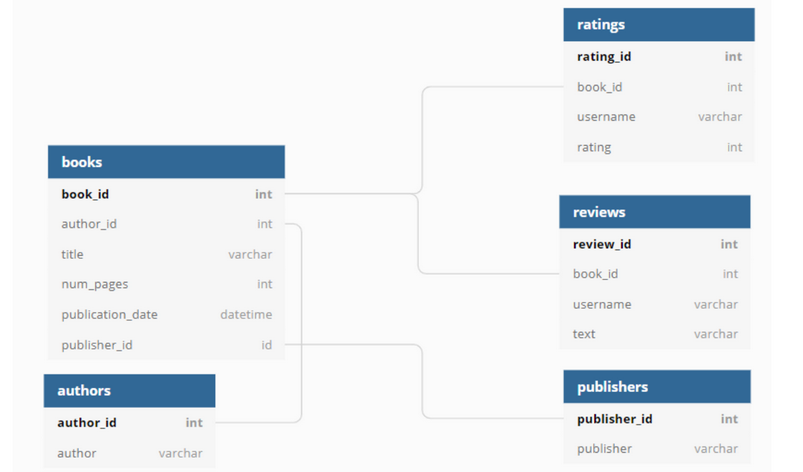

## Подключение к БД

In [1]:
!pip install psycopg2-binary

In [2]:
# импортируем бибилиотеки

import pandas as pd
import warnings; warnings.filterwarnings(action='once')

from sqlalchemy import create_engine

In [3]:
# устанавливаем параметры

db_config = {
    'user': '-censored-', # имя пользователя
    'pwd': '-censored-', # пароль
    'host': '-censored-', 'port': 0000, # порт подключения
    'db': '-censored-'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'], 
                                                         db_config['db'])

# сохраняем коннектор

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Знакомство с таблицами

### `books`

In [4]:
query = '''

SELECT *
FROM books
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### `authors`

In [5]:
query = '''

SELECT *
FROM authors
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


### `publishers`

In [6]:
query = '''

SELECT *
FROM publishers
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### `ratings`

In [7]:
query = '''

SELECT *
FROM ratings
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### `reviews`

In [8]:
query = '''

SELECT *
FROM reviews
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Задания

### Посчитайте, сколько книг вышло после 1 января 2000 года;

In [9]:
query = '''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''

pd.io.sql.read_sql(query, con = engine)

,count
0,819


После 1 января 2000 года в каталог сервиса было добавлено **819** книг и брошюр.

### Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [10]:
query = '''

SELECT b.book_id, 
       b.title, 
       COUNT(DISTINCT rv.review_id) AS cnt_reviews, 
       ROUND(AVG(r.rating),3) AS avg_rating
FROM books AS b

LEFT JOIN reviews AS rv
ON b.book_id = rv.book_id

LEFT JOIN  ratings AS r
ON b.book_id = r.book_id

GROUP BY b.book_id, b.title
ORDER BY cnt_reviews DESC

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,title,cnt_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.663
1,963,Water for Elephants,6,3.977
2,734,The Glass Castle,6,4.207
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.415
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.667
996,808,The Natural Way to Draw,0,3.000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000
998,221,Essential Tales and Poems,0,4.000


Всего в каталоге 1000 книг. Количество обзоров варьируется от 7 до полного их осутствия. Средний рейтинг каждой книги представлен в результате запроса выше. Можно отметить, что количество обзоров на книгу не коррелирует с средним рейтингом, т.к. речь идет исключительно о вкусовых предпочтениях пользователей.

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [11]:
query = '''

WITH 
-- исключаем брошюры --
tab AS (
SELECT publisher_id,
       book_id
FROM books
WHERE num_pages > 50
)

SELECT tab.publisher_id,
       p.publisher
FROM tab 

INNER JOIN publishers AS p
ON tab.publisher_id = p.publisher_id

GROUP BY tab.publisher_id, p.publisher
ORDER BY COUNT(tab.book_id) DESC

LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,212,Penguin Books


Наиболее широко представлены книги (внимание: из анализа исключены брошюры с 50-ю  и меньше страницами) издательства **Penguin Books** (британское издательство, основанное в 1935 году в Лондоне сэром Алленом Лейном и его братьями Ричардом и Джоном). Главной заслугой издательства считают демократизацию книжного рынка, превратившую книгу из предмета роскоши в удовольствие, доступное массам.

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [12]:
query = '''

WITH 

--отбираем книги с количеством оценок более 50ти--
tab AS (
SELECT book_id
FROM ratings
GROUP BY book_id
HAVING COUNT(rating_id) > 50)


SELECT a.author_id, 
       a.author, 
       AVG(r.rating) AS avg_rating
FROM books AS b

INNER JOIN tab
ON b.book_id = tab.book_id

INNER JOIN authors AS a
ON b.author_id = a.author_id

INNER JOIN ratings AS r
ON tab.book_id = r.book_id

GROUP BY a.author_id, a.author
ORDER BY AVG(r.rating) DESC

LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.287097


Самые популярный авторы с средним рейтингом в **4.29** баллов из 5 - это тандем **Джоан Роулинг** (британской писательницы, автора популярной серии книг о Гарри Поттере) и американского иллюстратора **Мари Грандпре** (делала иллюстрации к обложкам и главам книг). 

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [13]:
query = '''

SELECT COUNT(DISTINCT rv.text)/ COUNT(DISTINCT rv.username) AS avg_rv_count
FROM ratings AS r

INNER JOIN reviews AS rv
ON r.username = rv.username

WHERE r.username in ( 
                    SELECT username
                    FROM ratings
                    GROUP BY username
                    HAVING COUNT(rating_id) > 50
                    )

'''

pd.io.sql.read_sql(query, con = engine)

,avg_rv_count
0,24


В среднем,  активные пользователи (активными считаются пользователи, поставившие болеее 50-ти оценок книгам и брошюрам) написали обзоры на **24** книги.